# Enunciado

Vamos obter informações sobre o rendimento de alunos de um curso em algumas disciplinas ao longo dos anos.

O primeiro arquivo contido no Dataset Notas, historico-alg1_SIGA_ANONIMIZADO.csv, refere-se ao aproveitamento de estudantes na disciplina ALGORITMOS 1 entre os anos de 2011 e 2022.

A primeira coluna ("matricula") é composta por números inteiros, onde cada número representa um indivíduo. Assim, repetições nessa coluna indicam que o estudante fez mais de uma vez a mesma matéria.

Atenção: R-nota indica REPROVAÇÃO POR NOTA e R-freq REPROVAÇÃO POR FALTA. Se houver outro "status" para representar reprovação, este dever ser trocado para o rótulo adequado (R-nota ou R-freq). Frequências < 75 causam reprovação por falta; Médias abaixo de 50 causam reprovação por nota.

Analise o dataset do referido arquivo para responder as seguintes perguntas:

1. Qual é a média de nota dos aprovados (no período total e por ano)?

2. Qual é a média de nota dos reprovados por nota (período total e ano)?

3. Qual é a frequência dos reprovados por nota (período total e por ano)?

4. Qual a porcentagem de evasões (total e anual)?

5. Como os anos de pandemia impactaram no rendimento dos estudantes em relação aos anos anteriores, considerando o rendimento dos aprovados, a taxa de cancelamento e as reprovações? Considere como anos de pandemia os anos de 2020 e 2021.

6. Compare a volta às aulas híbrida (2022 período 1) com os anos de pandemia e os anos anteriores.

7. Compare a volta às aulas presencial (2022 período 2) com a volta híbrida do item anterior.

# Importações

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns 

# Carregando Dados

In [2]:
df = pd.read_csv('historico-alg1_SIGA_ANONIMIZADO.csv')

# Análise Descritiva dos Dados

## Dimensão do Dataset

In [3]:
print(f'Número de linhas {df.shape[0]}')
print(f'Número de colunas {df.shape[1]}')

Número de linhas 909
Número de colunas 16


## Tratamento Valores Nulos

In [4]:
df.isna().sum()/df.shape[0]

matricula             0.000000
codigo                0.000000
disciplina            0.000000
periodo               0.000000
ano                   0.000000
curriculo             0.000000
ch                    0.000000
nota                  0.000000
frequencia            0.000000
status                0.000000
tipo                  0.000000
observacao            0.970297
natureza              0.000000
situacaoDiscente      0.000000
nomeTuma              0.265127
codigoCurriculoSie    0.000000
dtype: float64

In [5]:
df.sample(10)

,matricula,codigo,disciplina,periodo,ano,curriculo,ch,nota,frequencia,status,tipo,observacao,natureza,situacaoDiscente,nomeTuma,codigoCurriculoSie
58,30,CI1055,ALGORITMOS E ESTRUTURAS DE DADOS 1,1,2019,Sim,60,0,0,Aprovado,EQUIVALENCIA,NaN,Obrigatória,Registro ativo,NaN,21A
651,419,CI1055,ALGORITMOS E ESTRUTURAS DE DADOS 1,1,2022,Sim,60,84,100,Aprovado,TURMA,NaN,Obrigatória,Registro ativo,BCC5,21A
338,212,CI1055,ALGORITMOS E ESTRUTURAS DE DADOS 1,1,2020,Sim,60,0,100,Matriculado,TURMA,D,Obrigatória,Evasão,NaN,21A
165,95,CI055,ALGORITMOS E ESTRUTURAS DE DADOS I,Anual,2019,Sim,60,5,0,Reprovado,APROVEITAMENTO,NaN,-,Registro ativo,NaN,21A
612,390,CI1055,ALGORITMOS E ESTRUTURAS DE DADOS 1,1,2019,Sim,60,0,0,Aprovado,EQUIVALENCIA,NaN,Obrigatória,Conclusão formatura,NaN,21A
900,567,CI1055,ALGORITMOS E ESTRUTURAS DE DADOS 1,1,2022,Sim,60,91,100,Aprovado,TURMA,NaN,Obrigatória,Registro ativo,BCC2,21A
138,79,CI055,ALGORITMOS E ESTRUTURAS DE DADOS I,1,2016,Sim,60,83,93,Aprovado,TURMA,NaN,Obrigatória,Trancamento,D,21A
131,74,CI1055,ALGORITMOS E ESTRUTURAS DE DADOS 1,2,2021,Sim,60,93,100,Aprovado,TURMA,NaN,Obrigatória,Registro ativo,D,21A
518,327,CI1055,ALGORITMOS E ESTRUTURAS DE DADOS 1,1,2019,Sim,60,75,100,Aprovado,TURMA,NaN,Obrigatória,Registro ativo,E,21A
720,465,CI1055,ALGORITMOS E ESTRUTURAS DE DADOS 1,1,2019,Sim,60,0,0,Aprovado,EQUIVALENCIA,NaN,Obrigatória,Registro ativo,NaN,21A


Os valores nulos nas colunas 'observacao' e 'nomeTuma' não parecer ser problemas para as análises propostas aqui, por isso as colunas serão simplesmente removidas

In [6]:
df = df.drop(columns=['observacao','nomeTuma'], axis =1)

## Tratamento Tipo dos Dados

In [7]:
df.sample()

,matricula,codigo,disciplina,periodo,ano,curriculo,ch,nota,frequencia,status,tipo,natureza,situacaoDiscente,codigoCurriculoSie
854,540,CI1055,ALGORITMOS E ESTRUTURAS DE DADOS 1,1,2022,Sim,60,2,100,R-nota,TURMA,Obrigatória,Registro ativo,21A


In [8]:
df.dtypes

matricula              int64
codigo                object
disciplina            object
periodo               object
ano                    int64
curriculo             object
ch                     int64
nota                   int64
frequencia             int64
status                object
tipo                  object
natureza              object
situacaoDiscente      object
codigoCurriculoSie    object
dtype: object

In [9]:
df.loc[df['periodo'] == 'Anual', 'periodo'] = '2'
df['periodo'] = df['periodo'].astype('int64')

Todas as colunas parecerm estar com o tipo de dado adequado, apena a coluna periodo que possui números mas possui uma categoria 'Anual' e portante será mantida como string

## Distribuição dos Dados

In [10]:
num_atributes = df.select_dtypes(include=['int64','float64'])
cat_atributes = df.select_dtypes(exclude=['int64','float64'])

### Variáveis Númericos

In [11]:
num_atributes.describe()

,matricula,periodo,ano,ch,nota,frequencia
count,909.000000,909.000000,909.000000,909.0,909.000000,909.000000
mean,287.009901,1.193619,2019.002200,60.0,45.251925,70.081408
std,171.329142,0.395352,2.160416,0.0,36.945658,42.035699
min,0.000000,1.000000,2011.000000,60.0,0.000000,0.000000
25%,134.000000,1.000000,2018.000000,60.0,0.000000,0.000000
50%,288.000000,1.000000,2019.000000,60.0,53.000000,93.000000
75%,437.000000,1.000000,2021.000000,60.0,79.000000,100.000000
max,572.000000,2.000000,2022.000000,60.0,100.000000,100.000000


### Variáveis Categoricas

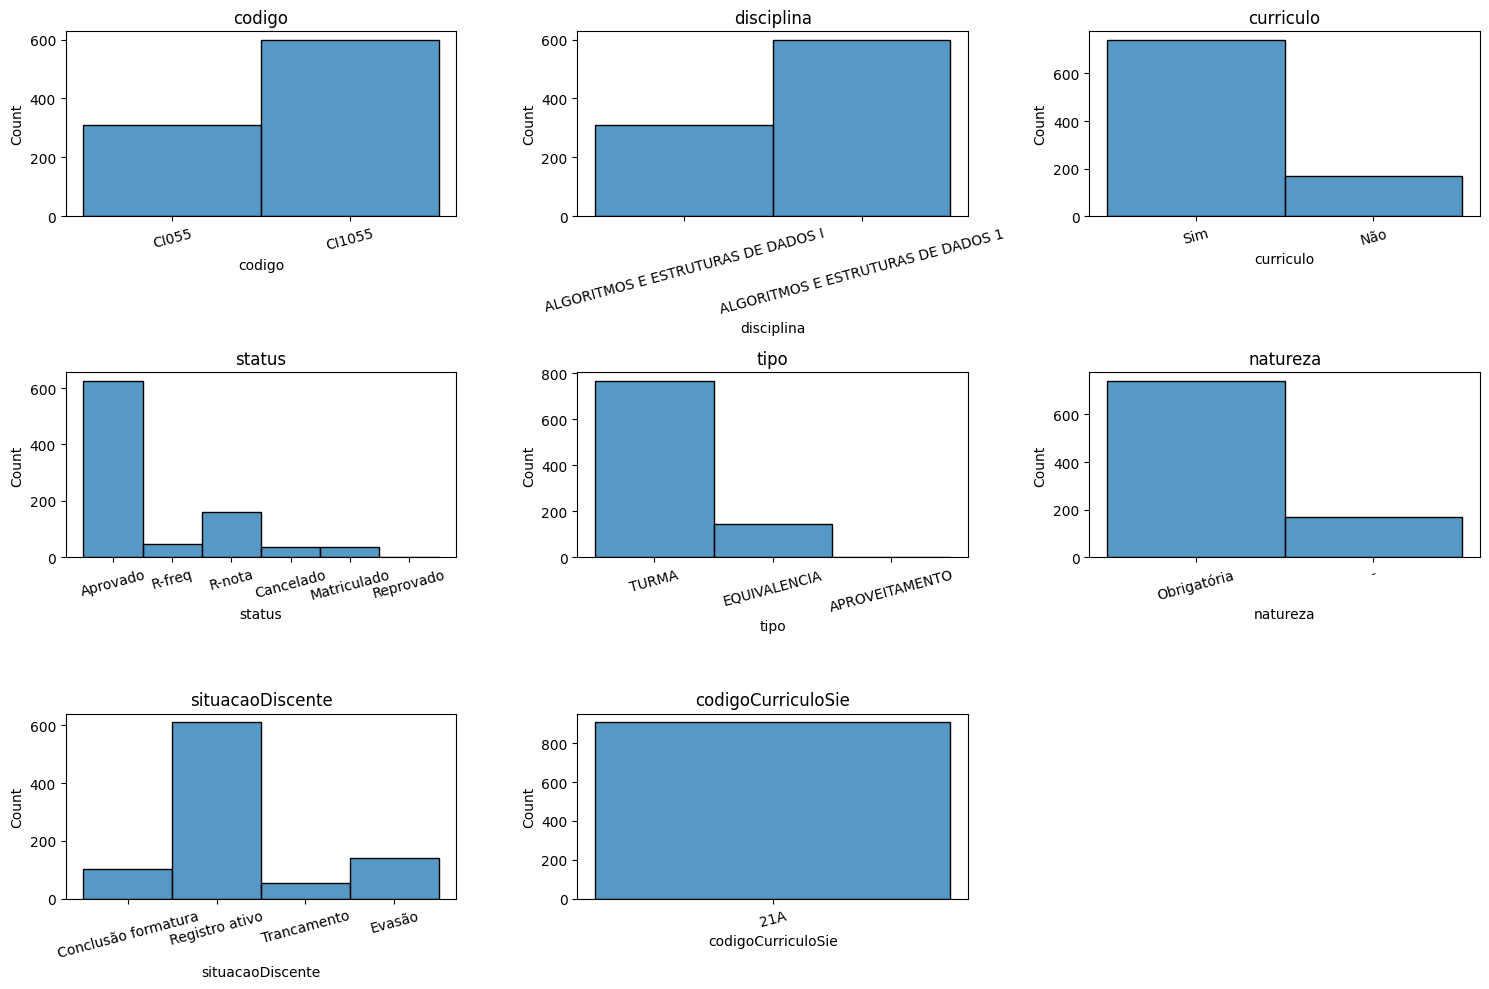

In [12]:
features = cat_atributes.columns.tolist()
ncols = 3 if int(np.ceil(np.sqrt(len(features)))) > 3 else int(np.ceil(np.sqrt(len(features))))
nrows = int(np.ceil(len(features)/ncols))

plt.figure(figsize=(15,10))
for col in cat_atributes.columns.tolist():
    plt.subplot(nrows,ncols,features.index(col)+1)
    plt.title(col)
    sns.histplot(cat_atributes[col])
    plt.xticks(rotation=15)

plt.tight_layout()

Notamos que o na coluna status há um valor identificado como 'Reprovado' sem especificar se a reprovação foi pro frequencia ou nota. Assim, esse valor será corrigido considerando primeiro a reprovação por frequencia, tendo a premissa que ela sempre ocorrerá primeiro que a reprovação por nota

### Corrigindo valores

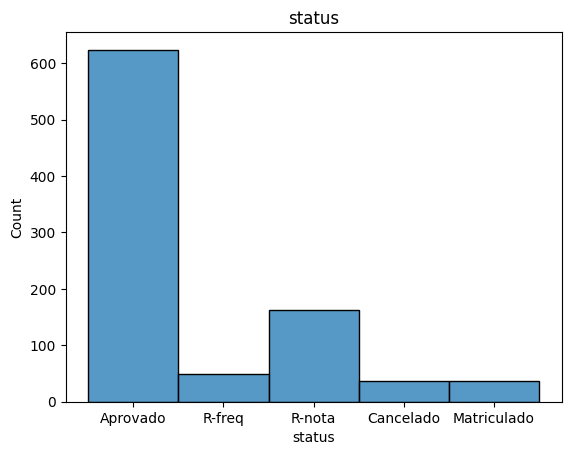

In [13]:
df.loc[df['status'] == 'Reprovado','status'] = df.loc[df['status'] == 'Reprovado'].apply(lambda x: 'R-freq' if x['frequencia'] < 75 else 'R-nota' if x['nota'] < 50 else x['status'], axis = 1)
plt.title('status')
sns.histplot(df['status']);

# Análise Exploratória

In [14]:
df.head()

,matricula,codigo,disciplina,periodo,ano,curriculo,ch,nota,frequencia,status,tipo,natureza,situacaoDiscente,codigoCurriculoSie
0,0,CI055,ALGORITMOS E ESTRUTURAS DE DADOS I,1,2016,Sim,60,67,96,Aprovado,TURMA,Obrigatória,Conclusão formatura,21A
1,1,CI1055,ALGORITMOS E ESTRUTURAS DE DADOS 1,1,2019,Sim,60,0,73,R-freq,TURMA,Obrigatória,Registro ativo,21A
2,1,CI1055,ALGORITMOS E ESTRUTURAS DE DADOS 1,2,2019,Sim,60,11,76,R-nota,TURMA,Obrigatória,Registro ativo,21A
3,1,CI1055,ALGORITMOS E ESTRUTURAS DE DADOS 1,2,2020,Sim,60,0,0,Cancelado,TURMA,Obrigatória,Registro ativo,21A
4,1,CI1055,ALGORITMOS E ESTRUTURAS DE DADOS 1,1,2020,Sim,60,0,0,Cancelado,TURMA,Obrigatória,Registro ativo,21A


## Análise Univariada

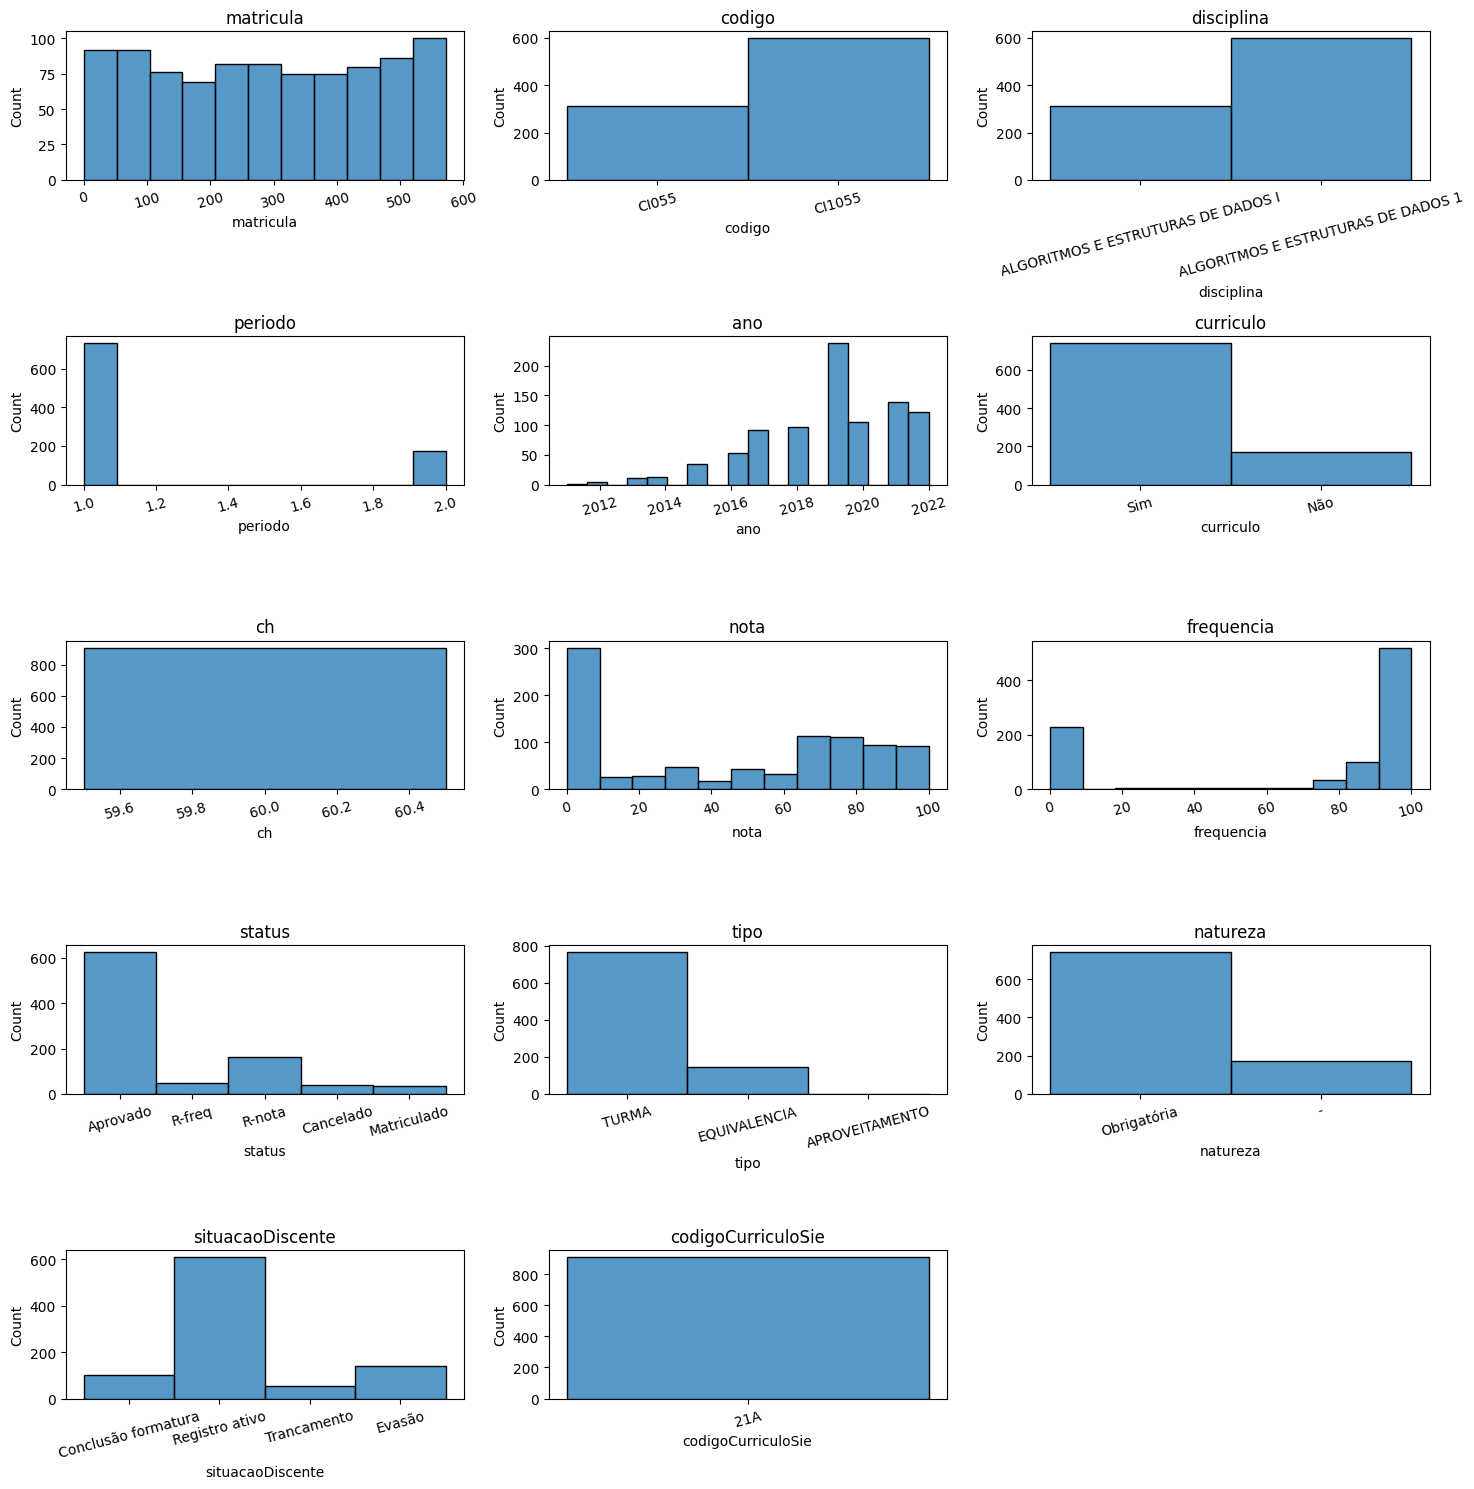

In [15]:
features = df.columns.tolist()
ncols = 3 if int(np.ceil(np.sqrt(len(features)))) > 3 else int(np.ceil(np.sqrt(len(features)))) > 3
nrows = int(np.ceil(len(features)/ncols))

plt.figure(figsize=(15,15))
for col in features:
    try:
        plt.subplot(nrows,ncols,features.index(col)+1)
    except:
        break
    plt.title(col)
    sns.histplot(df[col])
    plt.xticks(rotation=15)

plt.tight_layout()

## Respostas do Trabalho

1. Qual é a média de nota dos aprovados (no período total e por ano)?

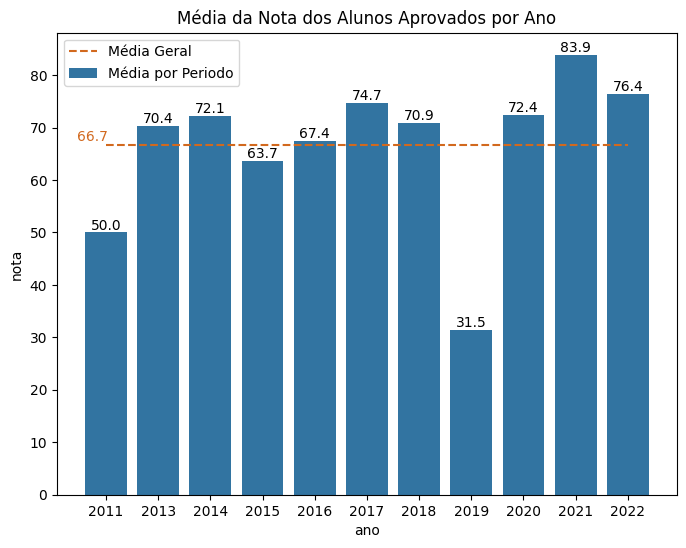

In [16]:
df_aux = df.loc[df['status'] == 'Aprovado', ['ano', 'nota']].groupby('ano').mean().reset_index()
df_aux['mean'] = df_aux['nota'].mean()

plt.figure(figsize = (8,6))
plt.title('Média da Nota dos Alunos Aprovados por Ano')

g = sns.barplot(x='ano', y='nota', data = df_aux, label = 'Média por Periodo')
for i in g.containers:
    g.bar_label(container=i, label_type='edge', color='black', fmt='%.1f')

sns.lineplot(df_aux['mean'], linestyle='--', color = 'chocolate', label = 'Média Geral')
plt.figtext(0.15,0.7,round(df_aux['nota'].mean(),1), color='chocolate')

plt.legend()

### 2. Qual é a média de nota dos reprovados por nota (período total e ano)?

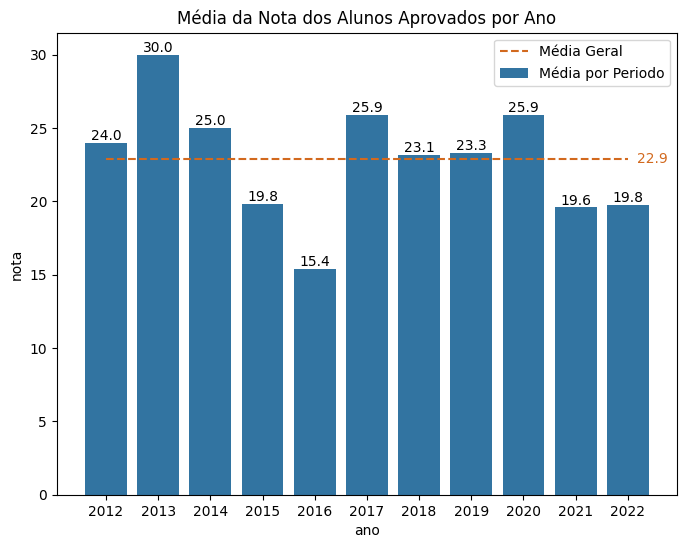

In [19]:
df_aux = df.loc[df['status'].isin(['R-nota']), ['ano', 'nota']].groupby('ano').mean().reset_index()
df_aux['media_reprovados'] = df_aux['nota'].mean()

plt.figure(figsize = (8,6))
plt.title('Média da Nota dos Alunos Aprovados por Ano')

g = sns.barplot(x='ano', y='nota', data = df_aux, label = 'Média por Periodo')
for i in g.containers:
    g.bar_label(container=i, label_type='edge', color='black', fmt='%.1f')

sns.lineplot(df_aux['media_reprovados'], linestyle='--', color = 'chocolate', label = 'Média Geral')
plt.figtext(0.85,df_aux['media_reprovados'].max()/df_aux['nota'].max()-0.1 ,round(df_aux['media_reprovados'].mean(),1), color='chocolate')

plt.legend();

### 3. Qual é a frequência dos reprovados por nota (período total e por ano)?

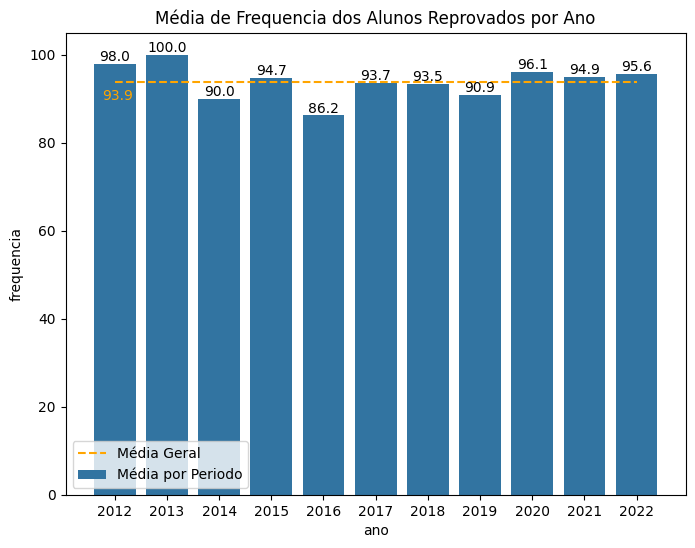

In [31]:
df_aux = df.loc[df['status'].isin(['R-nota']), ['ano', 'frequencia']].groupby('ano').mean().reset_index()
df_aux['media_reprovados'] = df.loc[df['status'].isin(['R-nota']), 'frequencia'].mean()

plt.figure(figsize = (8,6))
plt.title('Média de Frequencia dos Alunos Reprovados por Ano')

g = sns.barplot(x='ano', y='frequencia', data = df_aux, label = 'Média por Periodo')
for i in g.containers:
    g.bar_label(container=i, label_type='edge', color='black', fmt='%.1f')

sns.lineplot(df_aux['media_reprovados'], linestyle='--', color = 'orange', label = 'Média Geral')
plt.figtext(0.17,df_aux['media_reprovados'].max()/df_aux['frequencia'].max() -0.17 ,round(df_aux['media_reprovados'].mean(),1), color='orange')

plt.legend();

### 4. Qual a porcentagem de evasões (total e anual)?

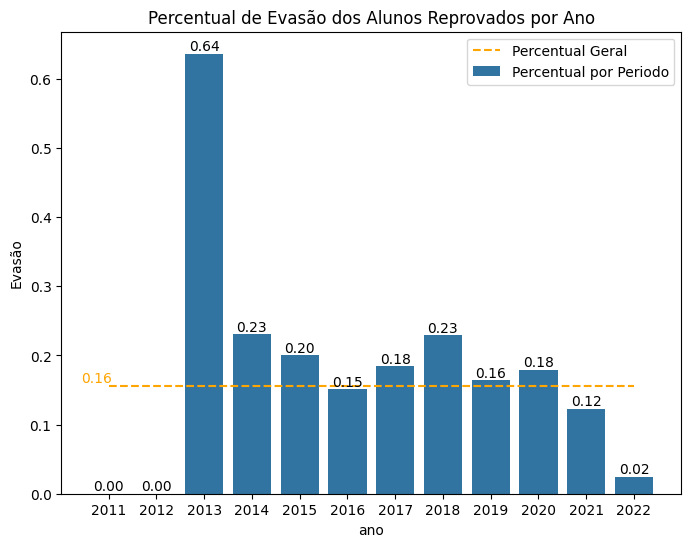

In [32]:
df_aux = pd.crosstab(df['ano'], df['situacaoDiscente'], normalize='index')['Evasão'].reset_index()
df_aux['media_periodo'] = df.loc[df['situacaoDiscente'] == 'Evasão'].shape[0]/df.shape[0]

plt.figure(figsize = (8,6))
plt.title('Percentual de Evasão dos Alunos Reprovados por Ano')

g = sns.barplot(x='ano', y='Evasão', data = df_aux, label = 'Percentual por Periodo')
for i in g.containers:
    g.bar_label(container=i, label_type='edge', color='black', fmt='%.2f')

sns.lineplot(df_aux['media_periodo'], linestyle='--', color = 'orange', label = 'Percentual Geral')
plt.figtext(0.15,df_aux['media_periodo'].max()/df_aux['Evasão'].max() + 0.05,round(df_aux['media_periodo'].mean(),2), color='orange')

plt.legend();

### 5. Como os anos de pandemia impactaram no rendimento dos estudantes em relação aos anos anteriores, considerando o rendimento dos aprovados, a taxa de cancelamento e as reprovações? Considere como anos de pandemia os anos de 2020 e 2021.

Considerando os anos de pandemia como sendo os anos de 2020 e 2021, é possível notar uma mudança no rendimento dos estudantes no que diz respeito à aprovações, reprovações e cancelamentos.

É notório o aumento dos cancelamentos do ano de 2019 para 2020 que foi de 20% e em 2021 o aumento das reprovações totais de 11% para 40%
Notamos ainda que uma pequena parcela dos alunos (4% em 2020 e 1% em 2021) continuam matriculados, indicando talvez que tenham trancado o curso

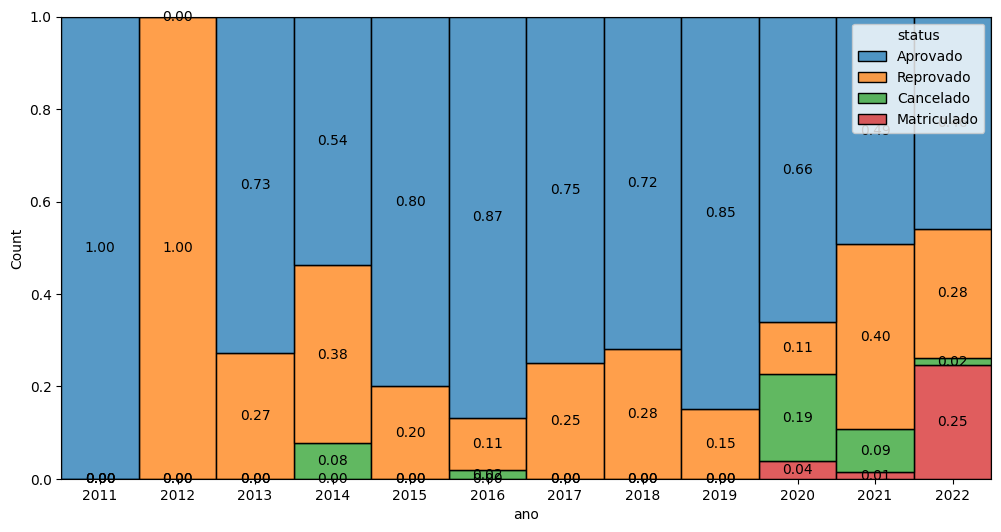

In [36]:
df_aux = df.copy()
df_aux['ano'] = df_aux['ano'].astype('str')
df_aux['status'] = df_aux['status'].replace({'R-freq':'Reprovado','R-nota':'Reprovado'})

plt.figure(figsize = (12,6))
g = sns.histplot(x = 'ano', hue = 'status', multiple = 'fill', data = df_aux.sort_values('ano'), bins=len(df_aux['ano'].unique())-1)
for i in g.containers:
    g.bar_label(i, label_type = 'center', fmt = '%.2f', color='black')

### 6. Compare a volta às aulas híbrida (2022 período 1) com os anos de pandemia e os anos anteriores.

A partir do ano de 2020/1, começamos a notar um aumento no percentual de cancelamentos e de reprovações que se estendeu até 2021/2 como é possível observar no gráfico

Com a volta às aulas de maneira híbrida em 2022/1, é possível notar o começo de uma diminuição das reprovações que era crescente nos anos de aula EAD

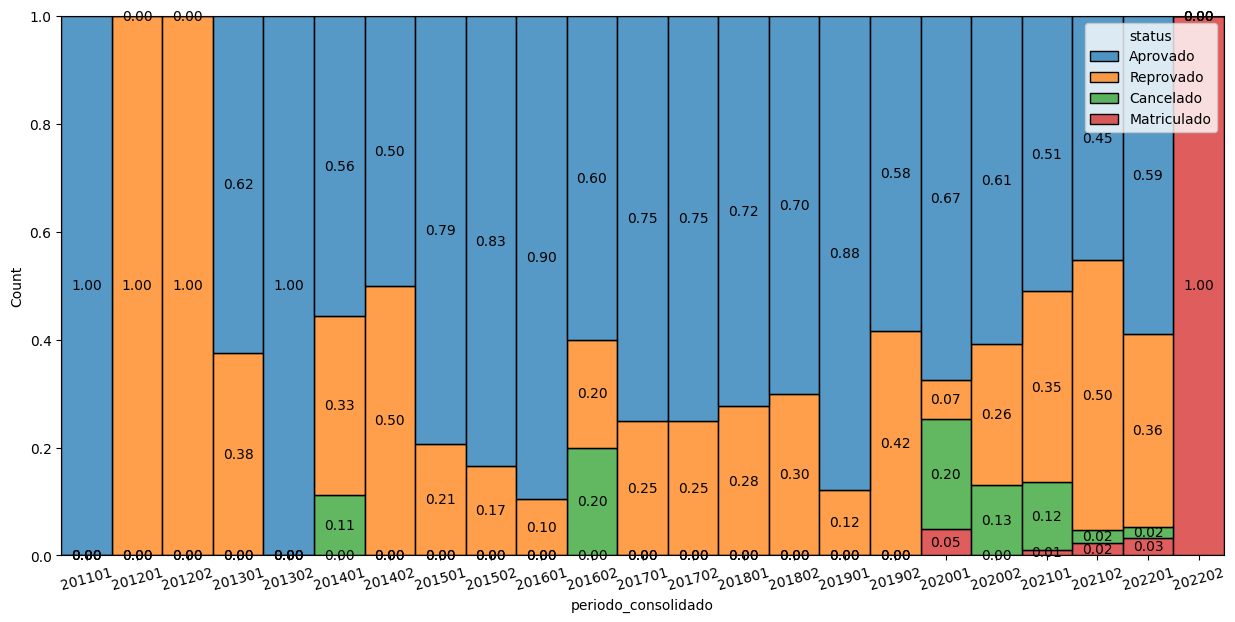

In [38]:
df_aux = df.copy()
df_aux['status'] = df_aux['status'].replace({'R-freq':'Reprovado','R-nota':'Reprovado'})
df_aux['periodo_consolidado'] = df_aux['ano']*100 +  df_aux['periodo']
df_aux['periodo_consolidado'] = df_aux['periodo_consolidado'].astype(str)

plt.figure(figsize = (15,7))
g = sns.histplot(x = 'periodo_consolidado', hue = 'status', multiple = 'fill', data = df_aux.sort_values(by='periodo_consolidado'), bins=len(df_aux['periodo_consolidado'].unique())-1)
for i in g.containers:
    g.bar_label(i, label_type = 'center', fmt = '%.2f', color='black')

plt.xticks(rotation = 15);


7. Compare a volta às aulas presencial (2022 período 2) com a volta híbrida do item anterior.

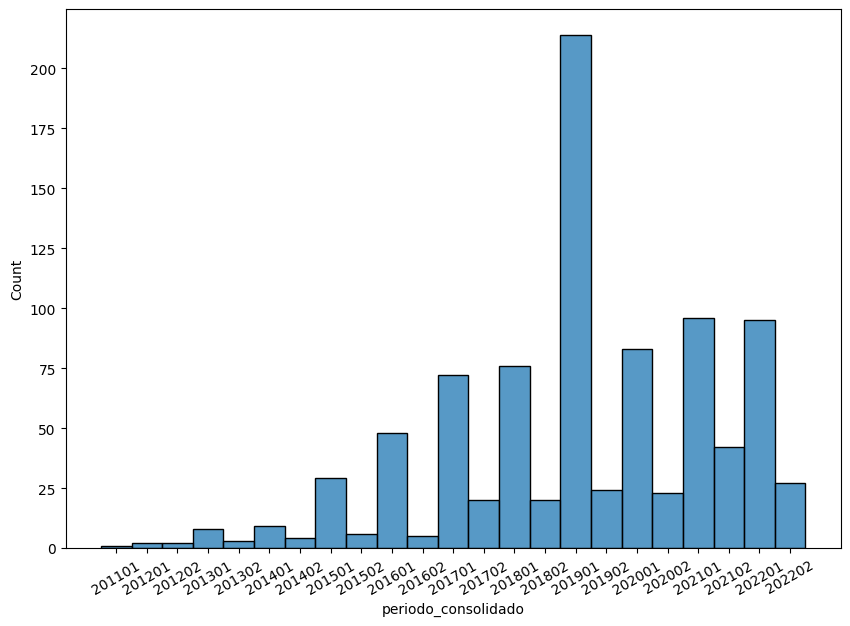

In [ ]:
plt.figure(figsize=(10,7))
sns.histplot(x = 'periodo_consolidado', data = df_aux.sort_values(by='periodo_consolidado'), bins=len(df_aux['periodo_consolidade'].unique())-1)
plt.xticks(rotation=30);